Time remaining:    1 s



IndexError: index 3 is out of bounds for axis 0 with size 3

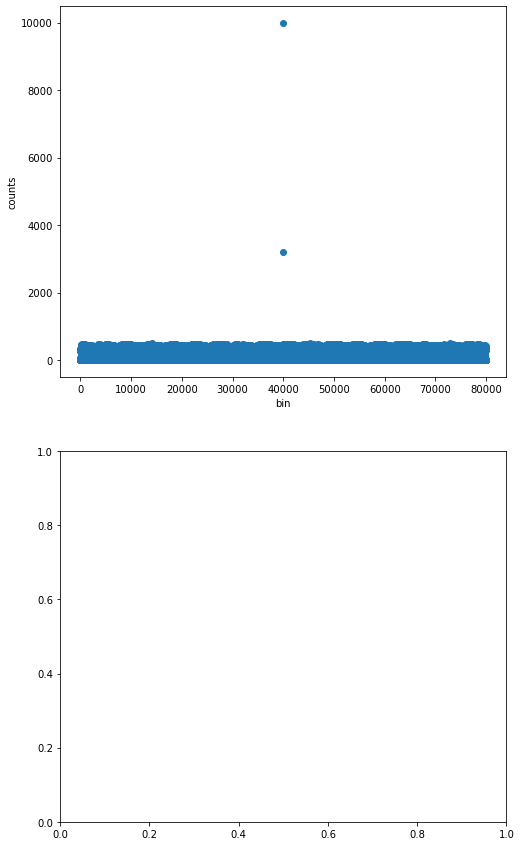

In [1]:
import datetime
import numpy as np
from TimeTagger import Coincidences, Counter, Correlation, createTimeTagger, freeTimeTagger, Countrate, CoincidenceTimestamp, Coincidence
import matplotlib.pyplot as plt
import sys
import time

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

if __name__ == "__main__":

    ch_1 = 6
    ch_2 = 7
    ch_h = 3
    triggerLevel = 0.8
    coin_window = 2500

    tagger = createTimeTagger()
    tagger.setTriggerLevel(ch_1, triggerLevel)
    tagger.setTriggerLevel(ch_2, triggerLevel)

    binwidth = 2500
    n_bins = 100
    
    
    coin_1h = Coincidence(
            tagger, [ch_1, ch_h], coincidenceWindow=coin_window, timestamp=CoincidenceTimestamp.Average
        )
    coin_2h = Coincidence(
            tagger, [ch_2, ch_h], coincidenceWindow=coin_window, timestamp=CoincidenceTimestamp.Average
        )
    ch_corr = Correlation(tagger, coin_1h.getChannel(), coin_2h.getChannel(), binwidth=binwidth, n_bins=n_bins)
    countrate = Countrate(tagger=tagger, channels=[coin_1h.getChannel(), coin_2h.getChannel(), ch_h])
    ch_corr.clear()

    sec = 100

    countrate.startFor(int(sec * 1e12))
    ch_corr.startFor(int(sec * 1e12))

    for i in range(0, sec - 1):
        sys.stdout.write("\r")
        sys.stdout.write(f"Time remaining: {(sec - i - 1):4d} s")
        sys.stdout.flush()
        time.sleep(1)
    print("\n")
    countrate.waitUntilFinished()
    ch_corr.waitUntilFinished()

    single = countrate.getData()
    corr = ch_corr.getData()
    corr_normalized = ch_corr.getDataNormalized()

    freeTimeTagger(tagger)

    t = datetime.datetime.now().strftime("%y.%m.%d_%H.%M.%S")
    filename = f"data_Haifei/g2_normalized_{t}_{binwidth}_{n_bins}_{ch_1}_{ch_2}_{triggerLevel}.txt"


    fig, axs = plt.subplots(2, figsize=(8, 15))
    # plt.figure(figsize=(12,8))
    axs[0].plot([i for i in range(len(corr))], corr, 'o', label="unheralded_g2")
    # axs[0].set_xlabel("(t2 - t1)/ns")
    axs[0].set_xlabel("bin")
    axs[0].set_ylabel("counts")
    # axs[0].legend()
    axs[1].plot([i for i in range(len(corr))], corr/((single[0]*single[1]*sec)/single[2]), 'o', label="unheralded_g2")
    axs[1].set_ylabel("g2")
    # axs[1].legend()
    annot_max([i for i in range(len(corr))],corr/((single[0]*single[1]*sec)/single[2]))

    try:
        plt.savefig(filename[:-4]+".jpg")
        np.savetxt(filename, corr/((single[0]*single[1]*sec)/80_000_000))
    except Exception as e:
        print(e)

    plt.show()
    
    

In [6]:
freeTimeTagger(tagger)

False

In [7]:
single[0]*single[1]/80_000_000

275.19497638762505

In [10]:
single[0]

145711.5

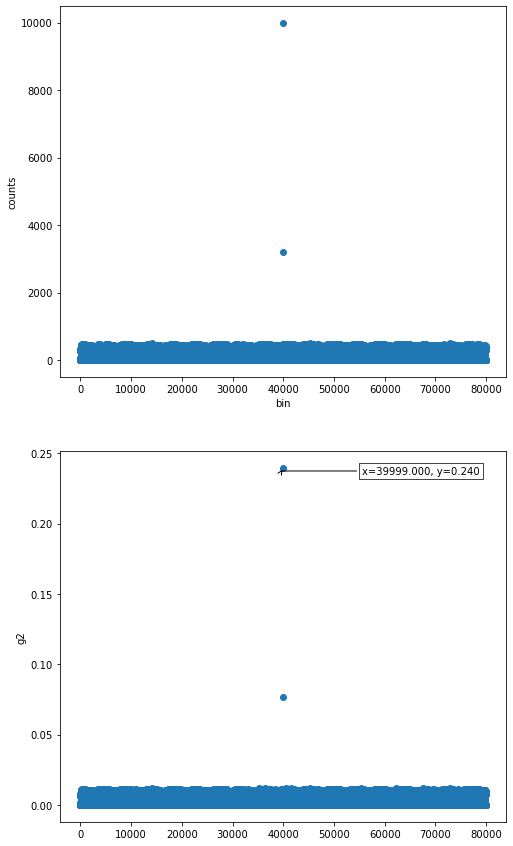

In [2]:
fig, axs = plt.subplots(2, figsize=(8, 15))
# plt.figure(figsize=(12,8))
axs[0].plot([i for i in range(len(corr))], corr, 'o', label="unheralded_g2")
# axs[0].set_xlabel("(t2 - t1)/ns")
axs[0].set_xlabel("bin")
axs[0].set_ylabel("counts")
# axs[0].legend()
axs[1].plot([i for i in range(len(corr))], corr/((single[0]*single[1]*sec)/single[2]), 'o', label="unheralded_g2")
axs[1].set_ylabel("g2")
# axs[1].legend()
annot_max([i for i in range(len(corr))],corr/((single[0]*single[1]*sec)/single[2]))

try:
    plt.savefig(filename[:-4]+".jpg")
    np.savetxt(filename, corr/((single[0]*single[1]*sec)/80_000_000))
except Exception as e:
    print(e)

plt.show()


In [27]:
np.savetxt(filename, corr/((single[0]*single[1]*sec)/80_000_000))